Decision Tree

In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
train = pd.read_csv("train70_augmented.csv")

In [3]:
train = pd.DataFrame(train)

In [4]:
print(train['target'].value_counts())

target
legitimate    7000000
bruteforce    1400000
flood         1400000
slowite       1400000
dos           1400000
malformed     1400000
Name: count, dtype: int64


In [5]:
rows = []

for i in train.index:
    if train['target'][i] == 'legitimate':
        rows.append(i)        

In [6]:
rows = rows[:5600000]

In [7]:
train = train.drop(rows)

In [8]:
print(train['target'].value_counts())

target
bruteforce    1400000
flood         1400000
slowite       1400000
dos           1400000
malformed     1400000
legitimate    1400000
Name: count, dtype: int64


In [9]:
# pre processamento de dados

features = train.iloc[:,:-1]
target = train['target']

print(features.shape)

(8400000, 33)


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label = LabelEncoder()

In [12]:
label.fit(target)

LabelEncoder()

In [13]:
list(label.classes_)

['bruteforce', 'dos', 'flood', 'legitimate', 'malformed', 'slowite']

In [14]:
target = label.transform(target)

In [15]:
# ajuste de dados 

# features com valores irrelevantes para o treinamento

columns = ['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conflag.qos', 
           'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.willflag', 
           'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len', 
           'mqtt.willtopic', 'mqtt.willtopic_len', 'mqtt.msg']

features = features.drop(columns, axis=1)

print(features.shape)

(8400000, 19)


In [16]:
# ajuste de variáveis categóricas

features = pd.get_dummies(features)

print(features.shape)
print(features.keys())

(8400000, 44)
Index(['tcp.time_delta', 'tcp.len', 'mqtt.conack.val',
       'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.uname',
       'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len', 'mqtt.msgid', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.qos', 'mqtt.ver', 'tcp.flags_0x00000002',
       'tcp.flags_0x00000004', 'tcp.flags_0x00000010', 'tcp.flags_0x00000011',
       'tcp.flags_0x00000012', 'tcp.flags_0x00000014', 'tcp.flags_0x00000018',
       'tcp.flags_0x00000019', 'mqtt.conack.flags_0',
       'mqtt.conack.flags_0x00000000', 'mqtt.conflags_0',
       'mqtt.conflags_0x00000002', 'mqtt.conflags_0x00000082',
       'mqtt.conflags_0x000000c2', 'mqtt.hdrflags_0',
       'mqtt.hdrflags_0x00000010', 'mqtt.hdrflags_0x00000020',
       'mqtt.hdrflags_0x00000030', 'mqtt.hdrflags_0x00000031',
       'mqtt.hdrflags_0x00000032', 'mqtt.hdrflags_0x0000003a',
       'mqtt.hdrflags_0x00000040', 'mqtt.hdrflags_0x00000050',
       'mqtt.hdrflags_0x00000082', 'mqtt.hdrflags_0x00000090'

In [17]:
col = ['tcp.flags_0x00000002',
       'tcp.flags_0x00000004', 'tcp.flags_0x00000010', 'tcp.flags_0x00000011',
       'tcp.flags_0x00000012', 'tcp.flags_0x00000014', 'tcp.flags_0x00000018',
       'tcp.flags_0x00000019', 'mqtt.conack.flags_0',
       'mqtt.conack.flags_0x00000000', 'mqtt.hdrflags_0',
       'mqtt.hdrflags_0x00000010', 'mqtt.hdrflags_0x00000020',
       'mqtt.hdrflags_0x00000030', 'mqtt.hdrflags_0x00000031',
       'mqtt.hdrflags_0x00000032', 'mqtt.hdrflags_0x0000003a',
       'mqtt.hdrflags_0x00000040', 'mqtt.hdrflags_0x00000050',
       'mqtt.hdrflags_0x00000082', 'mqtt.hdrflags_0x00000090',
       'mqtt.hdrflags_0x000000c0', 'mqtt.hdrflags_0x000000d0',
       'mqtt.hdrflags_0x000000e0', 'mqtt.protoname_0', 'mqtt.protoname_MQTT']

In [18]:
features[col] = features[col].replace({True: 1, False: 0})

In [19]:
features = features.values

print(type(features))
print(type(target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
# embaralhamento de dados

from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

In [22]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

In [23]:
tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None)

In [24]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# predição de valores

predict = tree.predict(X_test)

In [26]:
# metrics

from sklearn.metrics import classification_report


print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80    349632
           1       0.91      0.87      0.89    349590
           2       0.83      0.87      0.85    350283
           3       0.86      0.85      0.86    349794
           4       0.88      0.71      0.79    350173
           5       0.73      0.92      0.82    350528

    accuracy                           0.83   2100000
   macro avg       0.84      0.83      0.83   2100000
weighted avg       0.84      0.83      0.83   2100000



In [27]:
print("Accuracy train: {}".format(tree.score(X_train, y_train)))
print("Accuracy test: {}".format(tree.score(X_test, y_test)))

Accuracy train: 0.8333707936507937
Accuracy test: 0.8334157142857143


In [28]:
# confusion matrix

from sklearn.metrics import confusion_matrix

In [29]:
matrix = confusion_matrix(y_test, predict)

In [30]:
print(matrix)

[[272644  14854    703     97  24268  37066]
 [  4342 304490  11433  11634   5613  12078]
 [     0   1353 304285  34235    692   9718]
 [    23   1453  27840 298698    243  21537]
 [ 53254   8897   3148    596 247769  36509]
 [  1202   3769  20712     96   2462 322287]]


In [31]:
# display matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

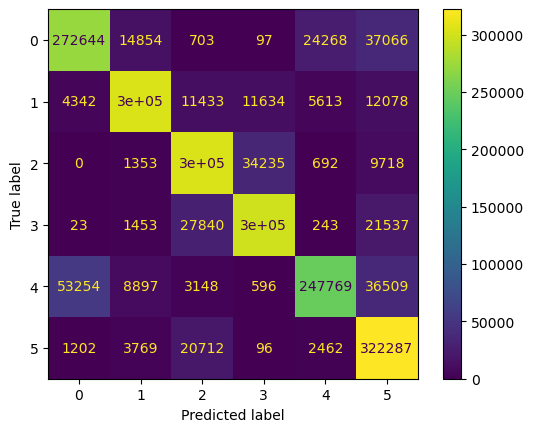

In [32]:
cm = confusion_matrix(y_test, predict, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)

disp.plot()
plt.show()